In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV


In [2]:
#reading the dataset file
df = pd.read_csv('DecisionTree_data_v4.csv')
df

,nowaed_BB,fuel_mix,num_of_days_on_supply,total_num_emails,cost_to_serve_pa,MRC,now_is_churned
0,0,2,760,0,24,1776,non-churn
1,0,2,760,0,0,2154,non-churn
2,0,1,760,0,0,3428,non-churn
3,0,2,572,6,70,531,churn
4,0,2,491,0,48,1218,non-churn
...,...,...,...,...,...,...,...
41932,0,2,760,17,212,1464,non-churn
41933,0,2,760,0,0,2151,non-churn
41934,0,2,760,0,44,2514,non-churn
41935,0,2,760,0,0,3200,non-churn


In [3]:
count = df['now_is_churned'].value_counts()
count

non-churn    27749
churn        14188
Name: now_is_churned, dtype: int64

In [6]:
percent = df['now_is_churned'].value_counts() / len(df)
percent

non-churn    0.661683
churn        0.338317
Name: now_is_churned, dtype: float64

In [4]:
percent = df['now_is_churned'].value_counts(normalize=True)
percent

non-churn    0.661683
churn        0.338317
Name: now_is_churned, dtype: float64

In [12]:
percent = df['now_is_churned'].value_counts(normalize=True).to_frame()
percent

,now_is_churned
non-churn,0.661683
churn,0.338317


In [11]:
# detecting nulls
df.isnull().values.any()

False

In [5]:
#shape of teh table
df.shape

(41937, 7)

In [6]:
df.info

<bound method DataFrame.info of        nowaed_BB  fuel_mix  num_of_days_on_supply  total_num_emails  \
0              0         2                    760                 0   
1              0         2                    760                 0   
2              0         1                    760                 0   
3              0         2                    572                 6   
4              0         2                    491                 0   
...          ...       ...                    ...               ...   
41932          0         2                    760                17   
41933          0         2                    760                 0   
41934          0         2                    760                 0   
41935          0         2                    760                 0   
41936          0         2                    760                 0   

       cost_to_serve_pa   MRC now_is_churned  
0                    24  1776      non-churn  
1                    

In [12]:
# descriptive statistics
df.describe()

,nowaed_BB,fuel_mix,num_of_days_on_supply,total_num_emails,cost_to_serve_pa,MRC
count,41937.000000,41937.000000,41937.000000,41937.000000,41937.000000,41937.000000
mean,0.020340,1.889262,622.423874,1.121873,28.267234,1826.503422
std,0.141162,0.334767,204.111222,3.546955,75.610011,1042.480012
min,0.000000,0.000000,91.000000,0.000000,0.000000,23.000000
25%,0.000000,2.000000,494.000000,0.000000,0.000000,1100.000000
50%,0.000000,2.000000,760.000000,0.000000,0.000000,1715.000000
75%,0.000000,2.000000,760.000000,1.000000,24.000000,2375.000000
max,1.000000,2.000000,760.000000,99.000000,1000.000000,11316.000000


In [13]:
# generating a dataframe with all predictors
X=df[df.columns[~df.columns.isin(['now_is_churned'])]]
X

,nowaed_BB,fuel_mix,num_of_days_on_supply,total_num_emails,cost_to_serve_pa,MRC
0,0,2,760,0,24,1776
1,0,2,760,0,0,2154
2,0,1,760,0,0,3428
3,0,2,572,6,70,531
4,0,2,491,0,48,1218
...,...,...,...,...,...,...
41932,0,2,760,17,212,1464
41933,0,2,760,0,0,2151
41934,0,2,760,0,44,2514
41935,0,2,760,0,0,3200


In [17]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [15]:
# a dataframe with the label 
y=df[['now_is_churned']]
y

,now_is_churned
0,non-churn
1,non-churn
2,non-churn
3,churn
4,non-churn
...,...
41932,non-churn
41933,non-churn
41934,non-churn
41935,non-churn


In [16]:
# splitting the dataset into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=0)
X_test

,nowaed_BB,fuel_mix,num_of_days_on_supply,total_num_emails,cost_to_serve_pa,MRC
33741,0,2,760,0,0,2369
836,0,2,760,0,0,1635
12583,0,2,760,1,118,1986
8269,0,2,760,0,0,2136
3167,0,1,221,10,247,164
...,...,...,...,...,...,...
16327,0,2,760,0,0,1464
13843,0,1,760,0,0,1967
10978,0,2,760,13,305,3334
2367,0,2,667,0,0,3501


## DecisionTree

In [18]:
# Instantiate a Decision Tree classifier: 
dtc = DecisionTreeClassifier(max_depth=2,random_state=0)

In [214]:
# fit the model in the training set
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

[Text(465.0, 755.0, 'number_of_days_on_supply <= 759.5\ngini = 0.448\nsamples = 29355\nvalue = [9931, 19424]\nclass = non-churn'),
 Text(232.5, 453.0, 'MRC <= 1002.5\ngini = 0.39\nsamples = 12209\nvalue = [8969, 3240]\nclass = churn'),
 Text(116.25, 151.0, 'gini = 0.467\nsamples = 5255\nvalue = [3306, 1949]\nclass = churn'),
 Text(348.75, 151.0, 'gini = 0.302\nsamples = 6954\nvalue = [5663, 1291]\nclass = churn'),
 Text(697.5, 453.0, 'MRC <= 2280.5\ngini = 0.106\nsamples = 17146\nvalue = [962, 16184]\nclass = non-churn'),
 Text(581.25, 151.0, 'gini = 0.091\nsamples = 10453\nvalue = [497, 9956]\nclass = non-churn'),
 Text(813.75, 151.0, 'gini = 0.129\nsamples = 6693\nvalue = [465, 6228]\nclass = non-churn')]

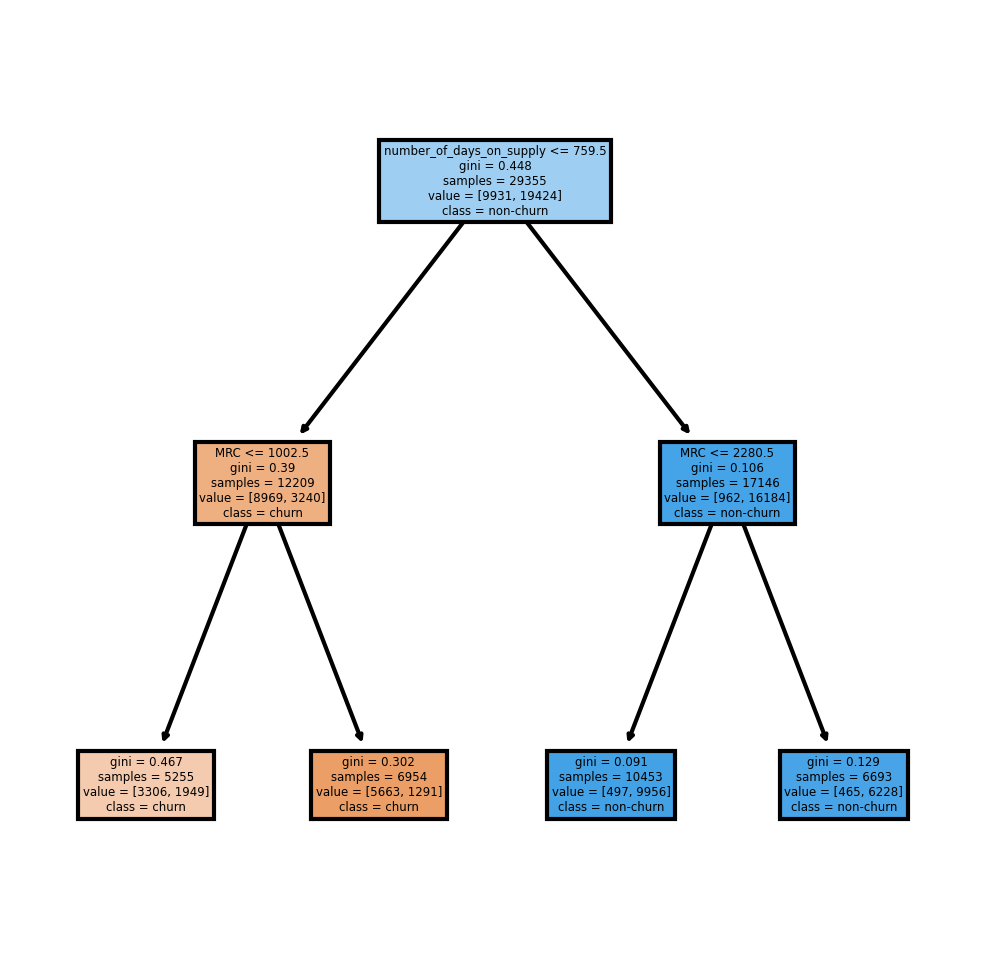

In [216]:
fn=['nowaed_BB','fuel_mix','number_of_days_on_supply','total_num_emails','cost_to_serve_pa','MRC']
cn=['churn','non-churn']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)

tree.plot_tree(dtc, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)

In [277]:
Y_predict = dtc.predict(X_test)
Y_predict

array(['non-churn', 'non-churn', 'non-churn', ..., 'non-churn', 'churn',
       'non-churn'], dtype=object)

In [218]:
accuracy_score(Y_test,Y_predict)

0.8494674932443173

In [262]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

       churn       0.72      0.90      0.80      4257
   non-churn       0.94      0.83      0.88      8325

    accuracy                           0.85     12582
   macro avg       0.83      0.86      0.84     12582
weighted avg       0.87      0.85      0.85     12582



## Hyperparameter Tuning

In [205]:
# Setup the parameters and distributions to sample from
param_dist = {"max_depth": [3, 4],
              "max_features": randint(1,3,5),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

In [228]:
# intantiating a randomizedsearcgGrid
dtc_ = DecisionTreeClassifier()
dtc_cv = RandomizedSearchCV(dtc_, param_dist, cv=5)

In [221]:
dtc_cv.fit(X_train,Y_train)

C:\Users\Anto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Anto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Anto\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 898, in fit
    super().fit(
  File "C:\Users\Anto\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 288, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0, n_features]

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Anto\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters wil

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D049F72040>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D049EC7280>})

In [222]:
Y_predict_ht = dtc_cv.predict(X_test)

In [223]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_predict_ht)

0.8494674932443173

In [224]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_predict_ht)

array([[3814,  443],
       [1451, 6874]], dtype=int64)

In [213]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

       churn       0.72      0.90      0.80      4257
   non-churn       0.94      0.83      0.88      8325

    accuracy                           0.85     12582
   macro avg       0.83      0.86      0.84     12582
weighted avg       0.87      0.85      0.85     12582



In [186]:
# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dtc_cv.best_params_))
print("Best score is {}".format(dtc_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 5}
Best score is 0.8568557315619143


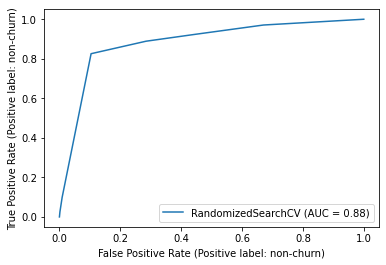

In [185]:
from sklearn.metrics import roc_curve
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(dtc_cv, X_test, Y_test) 

## Hyperparameter Tuning - GridSearch

In [229]:
# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, 4],
              "max_features": np.arange(1,3,5),
              "min_samples_leaf": np.arange(1, 9),
              "criterion": ["gini", "entropy"]}

In [230]:
from sklearn.model_selection import GridSearchCV
dtc_gs = GridSearchCV(dtc_, param_dist, cv=5)

In [231]:
dtc_gs.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [3, 4],
                         'max_features': array([1]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8])})

In [235]:
Y_predict_gs = dtc_gs.predict(X_test)
accuracy_score(Y_test,Y_predict_gs)

0.6980607216658719

In [237]:
confusion_matrix(Y_test,Y_predict_gs)

array([[ 742, 3515],
       [ 284, 8041]], dtype=int64)

In [239]:
print(classification_report(Y_test, Y_predict_gs))

              precision    recall  f1-score   support

       churn       0.72      0.17      0.28      4257
   non-churn       0.70      0.97      0.81      8325

    accuracy                           0.70     12582
   macro avg       0.71      0.57      0.54     12582
weighted avg       0.71      0.70      0.63     12582



## XGBoost

In [248]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Anto\anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          11 KB  conda-forge
    conda-4.12.0               |   py38haa244fe_0         1.0 MB  conda-forge
    libxgboost-1.5.1           |   cpu_h110a20b_2         2.3 MB  conda-forge
    py-xgboost-1.5.1           |cpu_py38hc22ac66_2         151 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    xgboost-1.5.1              |cpu_py38hc22ac66_2          13 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.5 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  conda-forge/win-64::_py-xgboost-mute



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [252]:
import xgboost as xgb

In [253]:
xg = xgb.XGBClassifier(objective='binary:logistic', n_estimators=6, seed=123)

In [254]:
xg.fit(X_train,Y_train)

[23:54:08] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Anto\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Anto\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=6, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [255]:
Y_predict_xgb = (xg.predict(X_test))

In [256]:
accuracy_score(Y_test,Y_predict_xgb)

0.8510570656493404

In [258]:
confusion_matrix(Y_test,Y_predict_xgb)

array([[3711,  546],
       [1328, 6997]], dtype=int64)

In [259]:
print(classification_report(Y_test, Y_predict_xgb))

              precision    recall  f1-score   support

       churn       0.74      0.87      0.80      4257
   non-churn       0.93      0.84      0.88      8325

    accuracy                           0.85     12582
   macro avg       0.83      0.86      0.84     12582
weighted avg       0.86      0.85      0.85     12582

